In [1]:
import tifffile as tiff
from octvision3d.utils import get_filenames
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
# Function to convert hex to RGB
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip('#')
    return tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))

In [3]:
# path = "/home/mstudxk5/Downloads/DRU/nnUNet_Dataset_v3/imagesTr"
# label_path = "/home/mstudxk5/Downloads/DRU/nnUNet_Dataset_v3/labelsTr"

path = "/data/dkermany_data/OCT/nnUNet_raw/Dataset002_NORMALsOnlyCorrected/imagesTs"
label_path = "/data/dkermany_data/OCT/nnUNet_raw/Dataset002_NORMALsOnlyCorrected/labelsTs"

# color_map = {
#     1: "#80ae80",  # CNV
#     2: "#f1d691",  # DRU
#     3: "#b17a65",  # EX
#     4: "#6fb8d2",  # FLU
#     5: "#d8654f",  # GA
#     6: "#dd8265",  # HEM
#     7: "#90ee90",  # RPE
#     8: "#a200ff",  # RET
#     9: "#8f8f70",  # CHO
#     10: "#e1f0fd", # VIT
#     11: "#75fafd", # HYA
#     12: "#b0fdd1", # SHS
#     13: "#fdfd54", # ART
#     14: "#387df8", # ERM
#     15: "#643200", # SES
# }

color_map = {
    1: "#90ee90",  # RPE
    2: "#a200ff",  # RET
    3: "#8f8f70",  # CHO
    4: "#e1f0fd", # VIT
    5: "#75fafd", # HYA
    6: "#b0fdd1", # SHS
    7: "#fdfd54", # ART
}

/data/dkermany_data/OCT/nnUNet_raw/Dataset002_NORMALsOnlyCorrected/imagesTs/RAI02_1-13-NORMAL-10-127813_0000.tif
(19, 496, 1024)
[1 2 3 4 7] [ 150850 1389078 4580700 3330401  199147]
Prediction


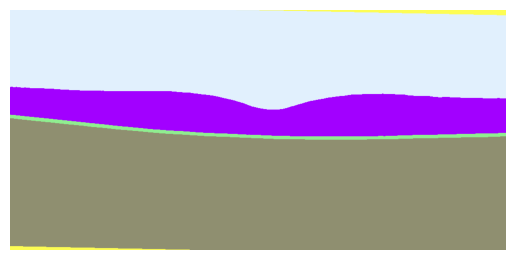

Label


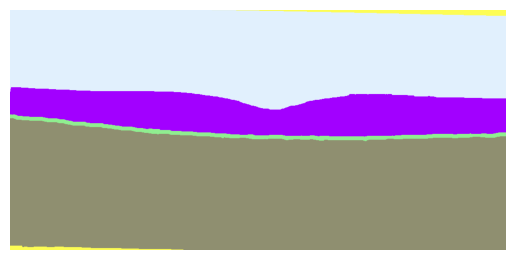

Original


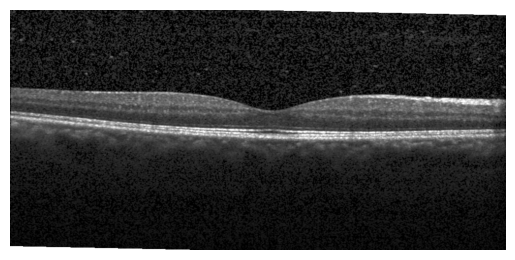

/data/dkermany_data/OCT/nnUNet_raw/Dataset002_NORMALsOnlyCorrected/imagesTs/RAI02_1-15-NORMAL-10-118307_0000.tif
(19, 496, 1024)
[1 2 3 4 5 6 7] [ 143830 1446488 5373624 1898152   87164   45892  655026]
Prediction


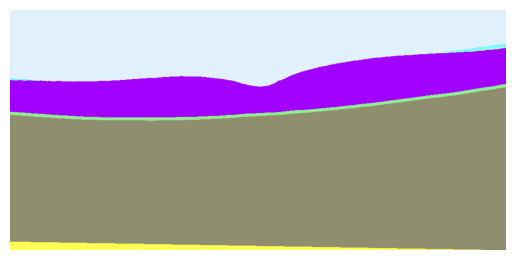

Label


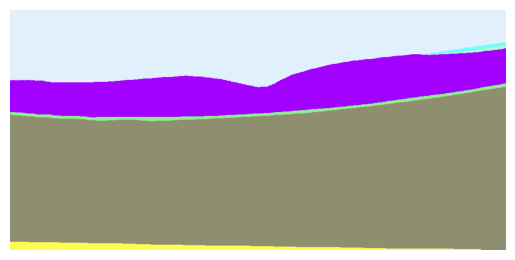

Original


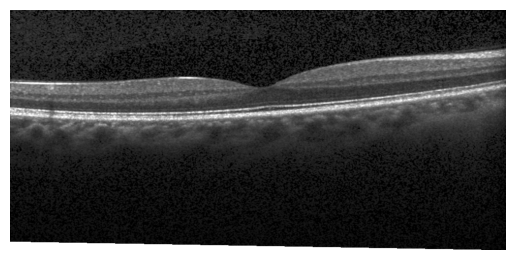

/data/dkermany_data/OCT/nnUNet_raw/Dataset002_NORMALsOnlyCorrected/imagesTs/RAI02_1-29-NORMAL-6-110819_0000.tif
(19, 496, 1024)
[1 2 3 4 5 6 7] [ 130555 1484896 6525427 1129420  104781   67885  207212]
Prediction


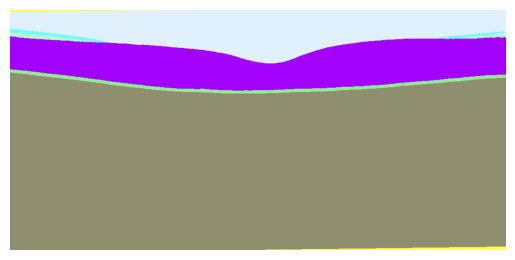

Label


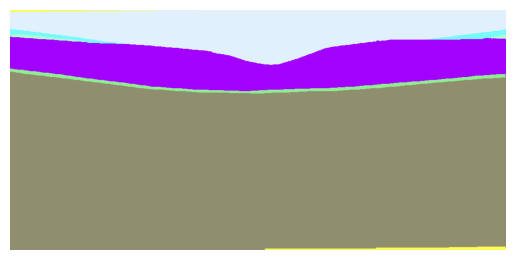

Original


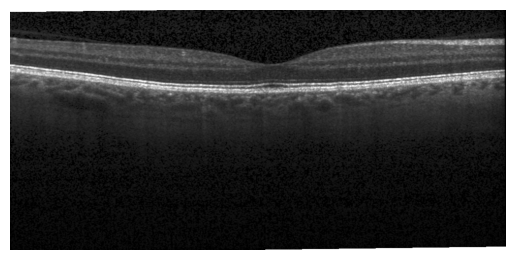

/data/dkermany_data/OCT/nnUNet_raw/Dataset002_NORMALsOnlyCorrected/imagesTs/RAI02_1-38-NORMAL-8-62864_0000.tif
(19, 496, 1024)
[1 2 3 4 7] [ 149719 1465392 4449829 3167173  418063]
Prediction


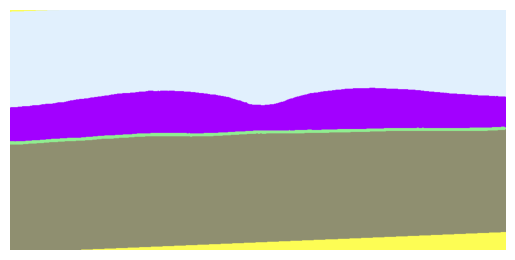

Label


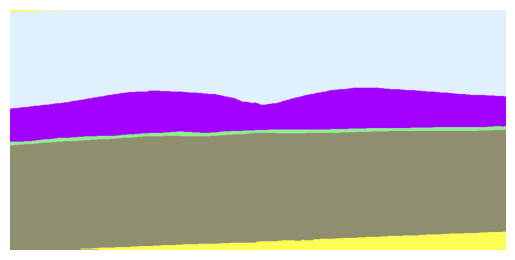

Original


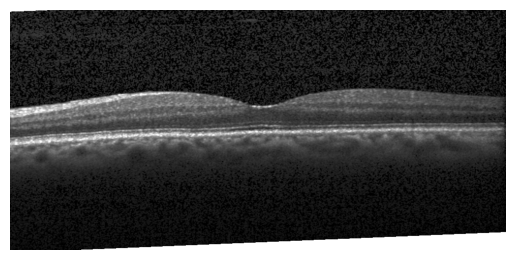

/data/dkermany_data/OCT/nnUNet_raw/Dataset002_NORMALsOnlyCorrected/imagesTs/RAI02_1-167-NORMAL-2-55680_0000.tif
(19, 496, 1024)
[1 2 3 4 5 6 7] [ 122881 1484881 5133942 2217315   86982   24761  579414]
Prediction


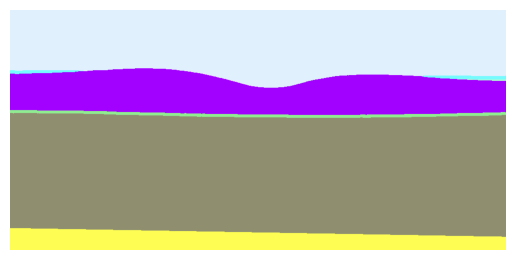

Label


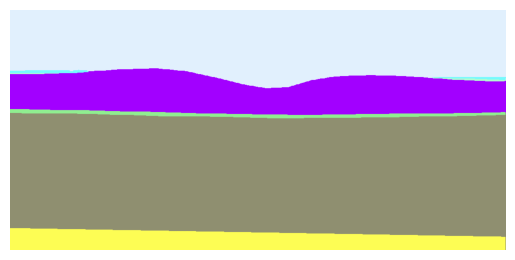

Original


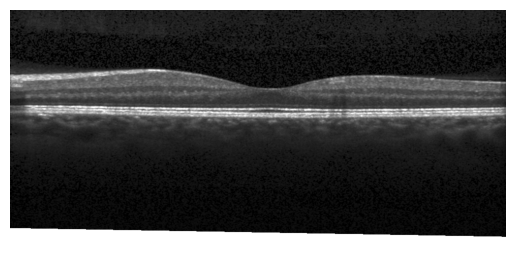

In [6]:
for f in get_filenames(path, "tif"):
    print(f)
    pred_f = os.path.join(os.path.dirname(f), "predicted", "_".join(os.path.basename(f).split("_")[:-1])+".tif")
    label_f = os.path.join(label_path, "_".join(os.path.basename(f).split("_")[:-1])+".tif")

    pred = tiff.imread(pred_f)
    orig = tiff.imread(f)
    label = tiff.imread(label_f)
    print(label.shape)

    unique_values, counts = np.unique(label, return_counts=True)
    print(values, counts)

    # Create a bar plot using seaborn
    plt.figure(figsize=(8, 6))
    sns.barplot(x=unique_values, y=counts)
    
    # Add labels and title
    plt.xlabel('Value')
    plt.ylabel('Count')
    plt.title('Count of Each Value in Array')
    
    # Show the plot
    plt.show()

    # Create an empty color image with shape (z, y, x, 3) for RGB channels
    z, y, x = orig.shape
    color_pred = np.zeros((z, y, x, 3), dtype=np.uint8)
    color_label = np.zeros((z, y, x, 3), dtype=np.uint8)

    # Map the grayscale image to the color image
    for grayscale_value, hex_color in color_map.items():
        rgb_color = hex_to_rgb(hex_color)
        color_pred[pred == grayscale_value] = rgb_color
        color_label[label == grayscale_value] = rgb_color

    
    print("Prediction")
    plt.axis("off")
    plt.imshow(color_pred[9])
    plt.show()
    print("Label")
    plt.axis("off")
    plt.imshow(color_label[9])
    plt.show()
    print("Original")
    plt.axis("off")
    plt.imshow(orig[9], cmap="gray")
    plt.show()

    # for i in range(19):
    #     output_name = os.path.splitext(f)[0] + f"slice{i}.png"
    #     # plt.axis("off")
    #     # plt.imshow(orig[i], cmap="gray")
    #     # plt.show()
    #     cv2.imwrite(output_name, orig[i])
    # break

